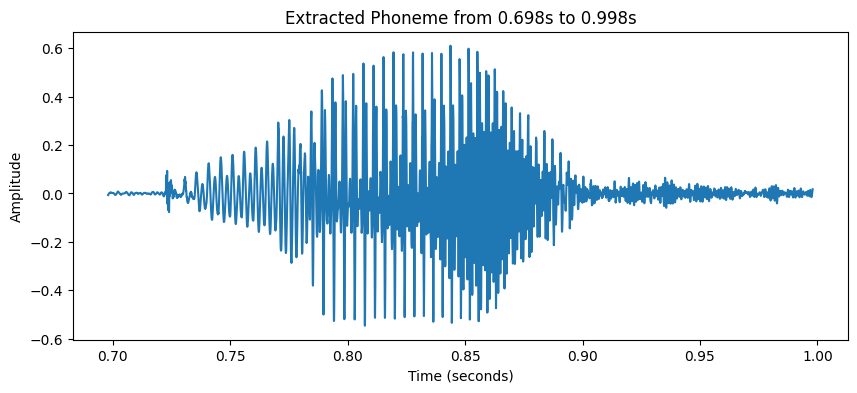

Energy in Vowels (300-3000 Hz): 355484.38
Energy in Consonants (4000-8000 Hz): 29078.74
Energy Ratio (Vowels/Consonants): 12.22


In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the speech waveform from LJ Speech dataset
audio_path = "/content/LJ001-0004.wav"
y, sr = librosa.load(audio_path, sr=16000)  # Load as mono and resample to 16kHz

# Automatically detect high-energy phoneme region
energy = np.sum(np.abs(stft_result) ** 2, axis=0)
peak_frame = np.argmax(energy)  # Find frame with highest energy
peak_time = peak_frame * (256 / sr)  # Convert STFT frame index to time

# Define a time window around the peak energy point
window_size = 0.3  # 300ms window
start_time = max(0, peak_time - window_size / 2)
end_time = min(len(y) / sr, peak_time + window_size / 2)
start_sample, end_sample = int(start_time * sr), int(end_time * sr)
phoneme_segment = y[start_sample:end_sample]

plt.figure(figsize=(10, 4))
plt.plot(np.linspace(start_time, end_time, len(phoneme_segment)), phoneme_segment)
plt.title(f"Extracted Phoneme from {start_time}s to {end_time}s")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

# Define frequency bands
low_freq_range = (300, 3000)  # Vowels
high_freq_range = (4000, 8000)  # Fricatives (Consonants)

# Compute STFT
stft_result = librosa.stft(y, n_fft=1024, hop_length=256)

# Compute energy in different frequency bands
def compute_band_energy(stft_matrix, sr, freq_range):
    freqs = librosa.fft_frequencies(sr=sr, n_fft=1024)
    band_indices = np.where((freqs >= freq_range[0]) & (freqs <= freq_range[1]))[0]
    return np.sum(np.abs(stft_matrix[band_indices, :]) ** 2)

energy_vowels = compute_band_energy(stft_result, sr, low_freq_range)
energy_consonants = compute_band_energy(stft_result, sr, high_freq_range)

# Compute energy ratio
energy_ratio = energy_vowels / (energy_consonants + 1e-6)
print(f"Energy in Vowels (300-3000 Hz): {energy_vowels:.2f}")
print(f"Energy in Consonants (4000-8000 Hz): {energy_consonants:.2f}")
print(f"Energy Ratio (Vowels/Consonants): {energy_ratio:.2f}")